# Problem Statement

##### This is the COVID-19 tweets dataset to predict the sentiment of Covid-19 tweets. Each record consists of three attributes:

##### UserName, ScreenName, Location, Tweet At, Original Tweet, Sentiment

##### Sentiment Label ->  0- Negative, 1- Positive, 2- Neutral
##### Read the coronavirus Tweets.csv file and set it as a Dataframe called covid_tweets. Check the head, info, and describe methods on covid_tweets 
##### Remove punctuations and stopwords from the text in the ‘OriginalTweet’ column. Replace special symbols with ‘_’(underscore). Convert all the letters to lowercase.
##### Normalize tweets by using Stemming or Lemmatization.
##### Preprocessed tweets should be included in the covid_tweets data frame as cleaned_tweets.
##### Create two objects X and y. X will be the ' cleaned_tweets ' column of covid_tweets data frame and y will be the ' Sentiment' column. 
##### create a CountVectorizer object and split the data into training and testing sets. Perform TFIDF vectorization on Text feature “cleaned_tweets’
##### Train a decision tree model for classifying the headlines and Displaying the confusion Matrix.
##### Display the HMM POS tagging on the first 2 rows of ‘cleaned_tweets’. 






In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# url = <google drive share URL can be given here>
# file_id = url.split('/')[-2]
# dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
# url2 = requests.get(dwn_url).text
# csv_raw = StringIO(url2)
csv_raw = "dataset/covid_tweets.csv"
covid_tweets = pd.read_csv(csv_raw)

In [3]:
covid_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799.0,48751.0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2.0
1,3800.0,48752.0,UK,16-03-2020,advice Talk to your neighbours family to excha...,1.0
2,3801.0,48753.0,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1.0
3,3802.0,48754.0,NaN,16-03-2020,My food stock is not the only one which is emp...,1.0
4,3803.0,48755.0,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0.0


In [4]:
covid_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UserName       1772 non-null   float64
 1   ScreenName     1772 non-null   float64
 2   Location       1409 non-null   object 
 3   TweetAt        1772 non-null   object 
 4   OriginalTweet  1772 non-null   object 
 5   Sentiment      1772 non-null   float64
dtypes: float64(3), object(3)
memory usage: 127.4+ KB


In [5]:
covid_tweets.shape

(2716, 6)

In [6]:
#Check duplicate rows in data
duplicate_rows = covid_tweets[covid_tweets.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (943, 6)


In [7]:
#looking for null values
print("Null values :: ")
print(covid_tweets.isnull().sum())

Null values :: 
UserName          944
ScreenName        944
Location         1307
TweetAt           944
OriginalTweet     944
Sentiment         944
dtype: int64


In [8]:
#Note: Location data having null values have no impact 
# for this problem statement. Therefore, rather than removing
# values are replaced with empty string to avoid runtime issues.
#This can be handled more elegantly because Sentiment needs to be removed if null
#But for the sake of easy implementation, it is done like that
covid_tweets.UserName = covid_tweets.UserName.fillna('')
covid_tweets.ScreenName = covid_tweets.ScreenName.fillna('')
covid_tweets.Location = covid_tweets.Location.fillna('')
covid_tweets.TweetAt = covid_tweets.TweetAt.fillna('')
covid_tweets.OriginalTweet = covid_tweets.OriginalTweet.fillna('')
covid_tweets.Sentiment = covid_tweets.Sentiment.fillna('')

In [9]:
covid_tweets.shape

(2716, 6)

In [10]:
#looking for null values
print("Null values :: ")
print(covid_tweets.isnull().sum())

Null values :: 
UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64


In [11]:
covid_tweets.describe()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,2716,2716,2716,2716,2716,2716
unique,1773,1773,964,3,1773,4
top,,,,17-03-2020,,
freq,944,944,1307,1116,944,944


In [12]:
#looking for null values
print("Null values :: ")
print(covid_tweets.isnull().sum())

Null values :: 
UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64


In [13]:
covid_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       2716 non-null   object
 1   ScreenName     2716 non-null   object
 2   Location       2716 non-null   object
 3   TweetAt        2716 non-null   object
 4   OriginalTweet  2716 non-null   object
 5   Sentiment      2716 non-null   object
dtypes: object(6)
memory usage: 127.4+ KB


In [14]:
covid_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799.0,48751.0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2.0
1,3800.0,48752.0,UK,16-03-2020,advice Talk to your neighbours family to excha...,1.0
2,3801.0,48753.0,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1.0
3,3802.0,48754.0,,16-03-2020,My food stock is not the only one which is emp...,1.0
4,3803.0,48755.0,,16-03-2020,"Me, ready to go at supermarket during the #COV...",0.0


In [15]:
#pring first five tweets full length
#Note: to be replaced pythonic code to check columns contains HTTP links or not
for ind in covid_tweets.index:
    print("===>>>>::: ", covid_tweets['OriginalTweet'][ind])
    if ind == 5:
        break
    

===>>>>:::  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
===>>>>:::  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
===>>>>:::  Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P





#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j




#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n
===>>>>:::  As news of the regions first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU


In [16]:
#Removing HTTP links from the text
import re
covid_tweets['OriginalTweet'] = covid_tweets['OriginalTweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [17]:
#First five tweets after removal of http links
#Note: to be replaced pythonic code to check columns contains HTTP links or not
for ind in covid_tweets.index:
    print("===>>>>::: ", covid_tweets['OriginalTweet'][ind])
    if ind == 5:
        break

===>>>>:::  @MeNyrbie @Phil_Gahan @Chrisitv 
===>>>>:::  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
===>>>>:::  Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak 





#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral 




#CoronavirusFrance #restezchezvous #StayAtHome #confinement 
===>>>>:::  As news of the regions first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports 


In [18]:
#Check how many records are there having special character in column Original Tweet 
val = covid_tweets[covid_tweets.OriginalTweet.str.contains(r'[@#&$%+-/*]')]
val.count()

UserName         1484
ScreenName       1484
Location         1484
TweetAt          1484
OriginalTweet    1484
Sentiment        1484
dtype: int64

In [19]:
#Check how many records are there having special character in column Location
val = covid_tweets[covid_tweets.Location.str.contains(r'[@#&$%+-/*]')]
val.count()

UserName         885
ScreenName       885
Location         885
TweetAt          885
OriginalTweet    885
Sentiment        885
dtype: int64

In [20]:
#Converting data to lowercase
covid_tweets["OriginalTweet"] = covid_tweets["OriginalTweet"].str.lower()
covid_tweets["Location"] = covid_tweets["Location"].str.lower()
covid_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799.0,48751.0,london,16-03-2020,@menyrbie @phil_gahan @chrisitv,2.0
1,3800.0,48752.0,uk,16-03-2020,advice talk to your neighbours family to excha...,1.0
2,3801.0,48753.0,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,1.0
3,3802.0,48754.0,,16-03-2020,my food stock is not the only one which is emp...,1.0
4,3803.0,48755.0,,16-03-2020,"me, ready to go at supermarket during the #cov...",0.0


In [21]:
#Replace special characters of Original Tweet & Location columns values with underscore
#Same needs to be done with Location as well
s = covid_tweets['OriginalTweet'].replace(regex=True, inplace=True, to_replace=r'[""~`!?@#&$%+-/*]',value=r'_')
s = covid_tweets['Location'].replace(regex=True, inplace=True, to_replace=r'[""~`!?@#&$%+-/*]',value=r'_')

In [22]:
for ind in covid_tweets.index:
    print(ind, "===>>>>::: ", covid_tweets['OriginalTweet'][ind])
    if ind == 100:
        break

0 ===>>>>:::  _menyrbie _phil_gahan _chrisitv 
1 ===>>>>:::  advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order
2 ===>>>>:::  coronavirus australia: woolworths to give elderly_ disabled dedicated shopping hours amid covid_19 outbreak 





_covid19france _covid_19 _covid19 _coronavirus _confinement _confinementotal _confinementgeneral 




_coronavirusfrance _restezchezvous _stayathome _confinement 
5 ===>>>>:::  as news of the regions first confirmed covid_19 case came out of sullivan county last week_ people flocked to area stores to purchase cleaning supplies_ hand sanitizer_ food_ toilet paper and other goods_ _tim_dodson reports 
6 ===>>>>:::  cashier at grocery store was sharing his insights on _covid_19 to prove his credibility he commented _i'm in civics class so i know what i'm talking about_

In [23]:
#Handling unicode data e.g. "canât a weâre" after handling it will become like "cant a were"
for ind in covid_tweets.index:
    covid_tweets['OriginalTweet'][ind] = re.sub(r'[^\x00-\x7f]',r'', covid_tweets['OriginalTweet'][ind])
    covid_tweets['Location'][ind] = re.sub(r'[^\x00-\x7f]',r'', covid_tweets['Location'][ind])

In [24]:
for ind in covid_tweets.index:
    print(ind, "===>>>>::: ", covid_tweets['OriginalTweet'][ind])
    if ind == 100:
        break

0 ===>>>>:::  _menyrbie _phil_gahan _chrisitv 
1 ===>>>>:::  advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order
2 ===>>>>:::  coronavirus australia: woolworths to give elderly_ disabled dedicated shopping hours amid covid_19 outbreak 





_covid19france _covid_19 _covid19 _coronavirus _confinement _confinementotal _confinementgeneral 




_coronavirusfrance _restezchezvous _stayathome _confinement 
5 ===>>>>:::  as news of the regions first confirmed covid_19 case came out of sullivan county last week_ people flocked to area stores to purchase cleaning supplies_ hand sanitizer_ food_ toilet paper and other goods_ _tim_dodson reports 
6 ===>>>>:::  cashier at grocery store was sharing his insights on _covid_19 to prove his credibility he commented _i'm in civics class so i know what i'm talking about__

In [25]:
#import nltk library for using its different functions
import nltk
import string
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

#  Sentence Tokenization  - Tokenizes sentences from text
from nltk.tokenize import sent_tokenize

# Word Tokenization  - Tokenizes words in sentences
from nltk.tokenize import word_tokenize

#Removal of stop words from the text
from nltk.corpus import stopwords

# Lemmatization
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sariya.ansari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sariya.ansari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sariya.ansari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sariya.ansari\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [26]:
# List of English stop words 
english_stop_words=set(stopwords.words("english"))
print(english_stop_words)

{'when', 'own', 'because', 'these', "shan't", 'from', 'theirs', 'was', 'each', "don't", 'were', 'my', 'down', 'some', 't', 'once', 'him', 'them', 'is', 'hasn', 'for', 'just', 'all', 'no', "shouldn't", 'over', "you've", 'ain', 'needn', "isn't", 'shouldn', 'his', 'doing', 'on', 'again', 'does', 'as', 'here', 'aren', 'o', 'they', "needn't", "couldn't", 'few', 'through', 'your', 'that', 'been', 'what', 'who', 'a', 'myself', 'their', 'do', 'and', 've', 'couldn', 'itself', 'at', 'did', "weren't", "aren't", 'we', 'by', 'the', 'wasn', 'haven', 'about', 'if', 'mustn', 'don', 'not', 'doesn', 'both', 'y', 'isn', "doesn't", "mustn't", 'until', 'which', 'should', 'more', 'are', 'themselves', 'shan', 'such', 'to', 'above', 'most', 'under', "hasn't", 'has', 'too', 're', "that'll", 'those', 'she', 'of', 'between', "won't", 'me', 'very', 'he', 'so', 'yourself', 'ma', 'won', 'during', 'same', 'in', 'herself', "didn't", 'than', 'there', "you're", 'or', 'can', 'while', "wouldn't", 'where', 'am', "should'v

In [27]:
covid_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799.0,48751.0,london,16-03-2020,_menyrbie _phil_gahan _chrisitv,2.0
1,3800.0,48752.0,uk,16-03-2020,advice talk to your neighbours family to excha...,1.0
2,3801.0,48753.0,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,1.0
3,3802.0,48754.0,,16-03-2020,my food stock is not the only one which is emp...,1.0
4,3803.0,48755.0,,16-03-2020,me_ ready to go at supermarket during the _cov...,0.0


In [28]:
#Creating empty data frame to represent X (i.e. cleaned_tweets) 
#and y (i.e. Sentiment)

# column name list 
col_names =  ['X', 'y']
  
# create an empty dataframe with columns
cleanedDf  = pd.DataFrame(columns = col_names)


In [29]:
covid_tweets['CleanedTweets'] = ""
i = 1
X = []
y = []
for ind in covid_tweets.index:
    #Removing punctuations
    tweet_words = word_tokenize(covid_tweets['OriginalTweet'][ind])
    tweet_only_words=[w for w in tweet_words if not w in string.punctuation]

    # Removal of stop words from the text
    keywords=[w for w in tweet_only_words if not w in english_stop_words]

    #Normalize tweets by using Lemmatization.
    wordnet_lemmatizer = WordNetLemmatizer()
    keywords=[w for w in keywords if w in wordnet_lemmatizer.lemmatize(w)]

    #not necessary but keeping it along with main dataset
    covid_tweets['CleanedTweets'][ind] = keywords

    #Preparing two objects 'X' as cleaned tweets & 'y' as Sentiments
    X.append(' '.join(keywords))
    y.append(covid_tweets['Sentiment'][ind])

#Keeping X & y objects as dataframe for backup
cleanedDf = pd.DataFrame({'X': X, 'y': y}) 

In [30]:
covid_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweets
0,3799.0,48751.0,london,16-03-2020,_menyrbie _phil_gahan _chrisitv,2.0,"[_menyrbie, _phil_gahan, _chrisitv]"
1,3800.0,48752.0,uk,16-03-2020,advice talk to your neighbours family to excha...,1.0,"[advice, talk, family, exchange, phone, create..."
2,3801.0,48753.0,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,1.0,"[coronavirus, australia, give, elderly_, disab..."
3,3802.0,48754.0,,16-03-2020,my food stock is not the only one which is emp...,1.0,"[food, stock, one, empty___, please_, n't, pan..."
4,3803.0,48755.0,,16-03-2020,me_ ready to go at supermarket during the _cov...,0.0,"[me_, ready, go, supermarket, _covid19, outbre..."


In [31]:
cleanedDf.head()

,X,y
0,_menyrbie _phil_gahan _chrisitv,2.0
1,advice talk family exchange phone create conta...,1.0
2,coronavirus australia give elderly_ disabled d...,1.0
3,food stock one empty___ please_ n't panic_ eno...,1.0
4,me_ ready go supermarket _covid19 outbreak_ 'm...,0.0


In [32]:
#Verifying that cleanedDf contains all records as in main dataset
print(covid_tweets.shape)
print(cleanedDf.shape)

(2716, 7)
(2716, 2)


**Difference Between CountVectorizer and TF-IDF**


```
# The only difference is that the TfidfVectorizer() returns floats while the CountVectorizer() returns ints. 
# TfidfVectorizer() assigns a score while CountVectorizer() counts.
```
We can understand the result of count vectorization and tf-idf result using below image

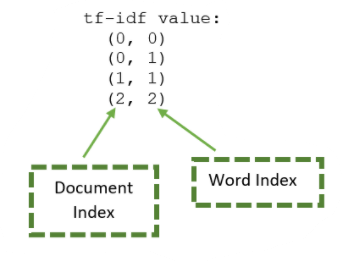


In [33]:
#Count Vectorization on feature X which is a representation of multiple document 

from sklearn.feature_extraction.text import CountVectorizer
# Create a Vectorizer Object
vectorizer = CountVectorizer()
  
vectorizer.fit(X)
  
# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
  
# Encode the Document
vector = vectorizer.transform(X)

print("Result after Encoding")
print(vector)

Vocabulary:  {'_menyrbie': 1139, '_phil_gahan': 1309, '_chrisitv': 499, 'advice': 1915, 'talk': 7651, 'family': 3950, 'exchange': 3859, 'phone': 6097, 'create': 3180, 'contact': 3045, 'list': 5191, 'employer': 3724, 'chemist': 2783, 'gp': 4374, 'set': 7032, 'online': 5835, 'shopping': 7101, 'adequate': 1900, 'regular': 6594, 'order': 5877, 'coronavirus': 3095, 'australia': 2223, 'give': 4318, 'elderly_': 3690, 'disabled': 3457, 'dedicated': 3315, 'amid': 2038, 'covid_19': 3152, 'outbreak': 5906, 'food': 4116, 'stock': 7416, 'one': 5828, 'empty___': 3728, 'please_': 6165, 'panic_': 5964, 'enough': 3755, 'everyone': 3833, 'take': 7641, 'need_': 5649, 'stay': 7389, 'calm_': 2622, 'safe_': 6846, '_covid19france': 613, '_covid_19': 634, '_covid19': 609, '_coronavirus': 569, '_confinement': 534, '_confinementotal': 536, '_confinementgeneral': 535, 'me_': 5392, 'ready': 6516, 'go': 4333, 'supermarket': 7550, 'outbreak_': 5907, 'paranoid_': 5988, 'litteraly': 5199, 'empty_': 3726, 'serious': 7

In [34]:
#TF-IDF on feature X which is a representation of multiple document in a sense 
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer

# create object
tfidf = TfidfVectorizer()
  
# get tf-df values
result = tfidf.fit_transform(X)

# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)


Word indexes:
{'_menyrbie': 1139, '_phil_gahan': 1309, '_chrisitv': 499, 'advice': 1915, 'talk': 7651, 'family': 3950, 'exchange': 3859, 'phone': 6097, 'create': 3180, 'contact': 3045, 'list': 5191, 'employer': 3724, 'chemist': 2783, 'gp': 4374, 'set': 7032, 'online': 5835, 'shopping': 7101, 'adequate': 1900, 'regular': 6594, 'order': 5877, 'coronavirus': 3095, 'australia': 2223, 'give': 4318, 'elderly_': 3690, 'disabled': 3457, 'dedicated': 3315, 'amid': 2038, 'covid_19': 3152, 'outbreak': 5906, 'food': 4116, 'stock': 7416, 'one': 5828, 'empty___': 3728, 'please_': 6165, 'panic_': 5964, 'enough': 3755, 'everyone': 3833, 'take': 7641, 'need_': 5649, 'stay': 7389, 'calm_': 2622, 'safe_': 6846, '_covid19france': 613, '_covid_19': 634, '_covid19': 609, '_coronavirus': 569, '_confinement': 534, '_confinementotal': 536, '_confinementgeneral': 535, 'me_': 5392, 'ready': 6516, 'go': 4333, 'supermarket': 7550, 'outbreak_': 5907, 'paranoid_': 5988, 'litteraly': 5199, 'empty_': 3726, 'serious':

In [35]:
print("Shape after CountVectorizer:", vector.shape)
print("Shape after tfidf result:", result.shape)

Shape after CountVectorizer: (2716, 8484)
Shape after tfidf result: (2716, 8484)


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

**Transformation Using TFIDF**

In [37]:
x_train_tf = tfidf.fit_transform(x_train)
#applying tf idf to training data
x_train_tf = tfidf.transform(x_train)
print("n_samples: %d, n_features: %d" % x_train_tf.shape)

#transforming test data into tf-idf matrix
x_test_tf = tfidf.transform(x_test)
print("n_samples: %d, n_features: %d" % x_test_tf.shape)

n_samples: 1901, n_features: 6701
n_samples: 815, n_features: 6701


In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train_tf, y_train)
y_pred = model.predict(x_test_tf)

In [39]:
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

                   0.94      1.00      0.97       286
         0.0       0.51      0.47      0.49       214
         1.0       0.51      0.44      0.47       227
         2.0       0.29      0.38      0.33        88

    accuracy                           0.64       815
   macro avg       0.56      0.57      0.56       815
weighted avg       0.63      0.64      0.63       815



In [40]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

Confusion Matrix:
[[286   0   0   0]
 [  5 100  71  38]
 [ 10  74 101  42]
 [  4  24  27  33]]
Model Accuracy: 0.6380368098159509


**Transformation Using Countvectorizer**

In [41]:
x_train_vect = vectorizer.fit_transform(x_train)
#applying tf idf to training data
x_train_vect = vectorizer.transform(x_train)
print("n_samples: %d, n_features: %d" % x_train_vect.shape)

#transforming test data into tf-idf matrix
x_test_vect = tfidf.transform(x_test)
print("n_samples: %d, n_features: %d" % x_test_vect.shape)

n_samples: 1901, n_features: 6701
n_samples: 815, n_features: 6701


In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train_vect, y_train)
y_pred_vect = model.predict(x_test_vect)

In [43]:
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred_vect))

Classification Report:
              precision    recall  f1-score   support

                   0.36      1.00      0.52       286
         0.0       0.33      0.01      0.02       214
         1.0       0.50      0.00      0.01       227
         2.0       0.00      0.00      0.00        88

    accuracy                           0.35       815
   macro avg       0.30      0.25      0.14       815
weighted avg       0.35      0.35      0.19       815



In [44]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_vect))

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Model Accuracy:",metrics.accuracy_score(y_test, y_pred_vect))

Confusion Matrix:
[[286   0   0   0]
 [211   2   1   0]
 [221   3   1   2]
 [ 87   1   0   0]]
Model Accuracy: 0.35460122699386504


In [45]:
covid_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweets
0,3799.0,48751.0,london,16-03-2020,_menyrbie _phil_gahan _chrisitv,2.0,"[_menyrbie, _phil_gahan, _chrisitv]"
1,3800.0,48752.0,uk,16-03-2020,advice talk to your neighbours family to excha...,1.0,"[advice, talk, family, exchange, phone, create..."
2,3801.0,48753.0,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,1.0,"[coronavirus, australia, give, elderly_, disab..."
3,3802.0,48754.0,,16-03-2020,my food stock is not the only one which is emp...,1.0,"[food, stock, one, empty___, please_, n't, pan..."
4,3803.0,48755.0,,16-03-2020,me_ ready to go at supermarket during the _cov...,0.0,"[me_, ready, go, supermarket, _covid19, outbre..."


In [46]:
print(covid_tweets.iloc[0]['CleanedTweets'])
print(covid_tweets.iloc[1]['CleanedTweets'])

['_menyrbie', '_phil_gahan', '_chrisitv']
['advice', 'talk', 'family', 'exchange', 'phone', 'create', 'contact', 'list', 'phone', 'employer', 'chemist', 'gp', 'set', 'online', 'shopping', 'adequate', 'regular', 'order']


In [47]:
#Performing part of speech tagging : 
print(nltk.pos_tag(covid_tweets.iloc[0]['CleanedTweets']))
print(nltk.pos_tag(covid_tweets.iloc[1]['CleanedTweets']))

[('_menyrbie', 'NN'), ('_phil_gahan', 'CD'), ('_chrisitv', 'NN')]
[('advice', 'NN'), ('talk', 'VB'), ('family', 'NN'), ('exchange', 'NN'), ('phone', 'NN'), ('create', 'NN'), ('contact', 'JJ'), ('list', 'NN'), ('phone', 'NN'), ('employer', 'NN'), ('chemist', 'NN'), ('gp', 'NN'), ('set', 'VBN'), ('online', 'RP'), ('shopping', 'VBG'), ('adequate', 'JJ'), ('regular', 'JJ'), ('order', 'NN')]
